FFT Result:
 [ 0.17444017+6.27276009e-15j -0.06834116+9.22588354e-02j
  0.12808155-6.66383863e-02j ... -0.11144424-8.82653341e-02j
  0.12808155+6.66383863e-02j -0.06834116-9.22588354e-02j]
Amplitude Spectrum:
 [0.17444017 0.11481379 0.14437991 ... 0.14216394 0.14437991 0.11481379]
Frequencies:
 [ 0.          0.34466589  0.68933177 ... -1.03399766 -0.68933177
 -0.34466589]


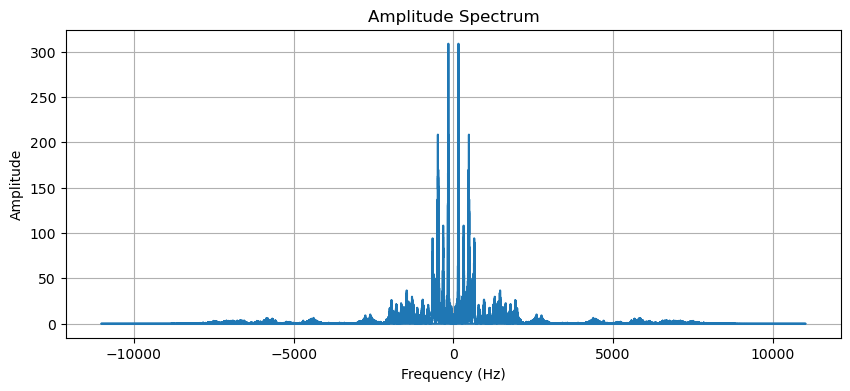

In [1]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa

audio_signal, sample_rate = librosa.load("statement.wav")

fft_result = np.fft.fft(audio_signal)

amplitude_spectrum = np.abs(fft_result)

frequencies = np.fft.fftfreq(len(audio_signal), d=1/sample_rate)

print("FFT Result:\n", fft_result)
print("Amplitude Spectrum:\n", amplitude_spectrum)
print("Frequencies:\n", frequencies)

plt.figure(figsize=(10, 4))
plt.plot(frequencies, amplitude_spectrum)
plt.title('Amplitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

C:\Users\buset\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


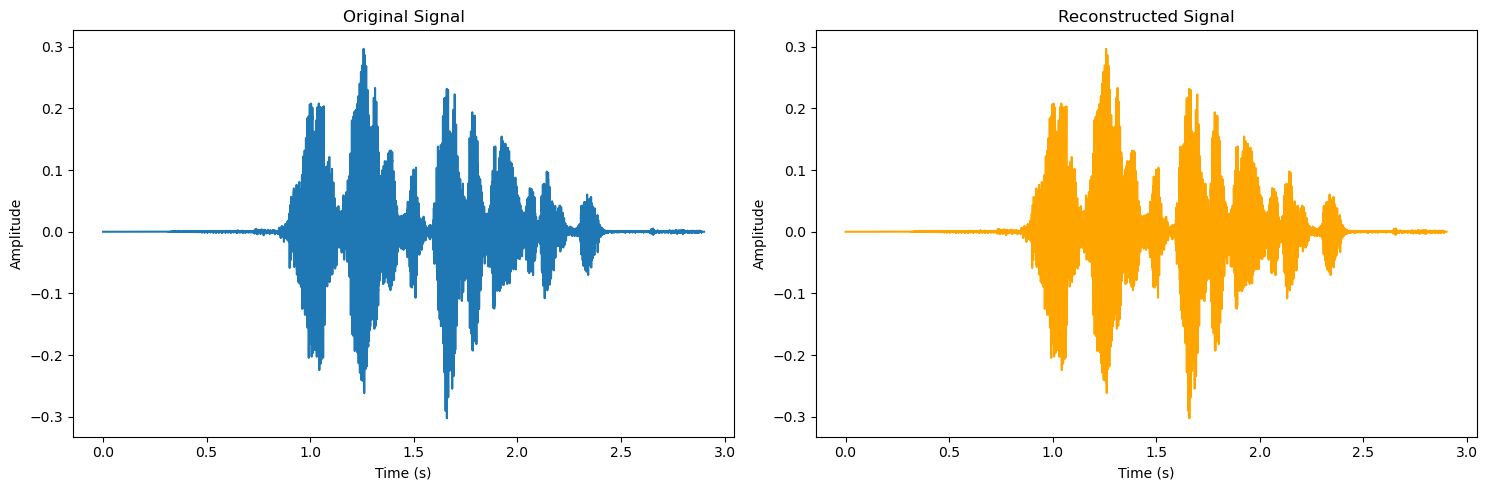

In [2]:
reconstructed_signal = np.fft.ifft(fft_result)
reconstructed_signal = reconstructed_signal[:len(audio_signal)]
time = np.linspace(0, len(audio_signal) / sample_rate, len(audio_signal))

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(time, audio_signal)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Original Signal")

plt.subplot(1, 2, 2)
plt.plot(time, reconstructed_signal, color="orange")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Reconstructed Signal")

plt.tight_layout()
plt.show()

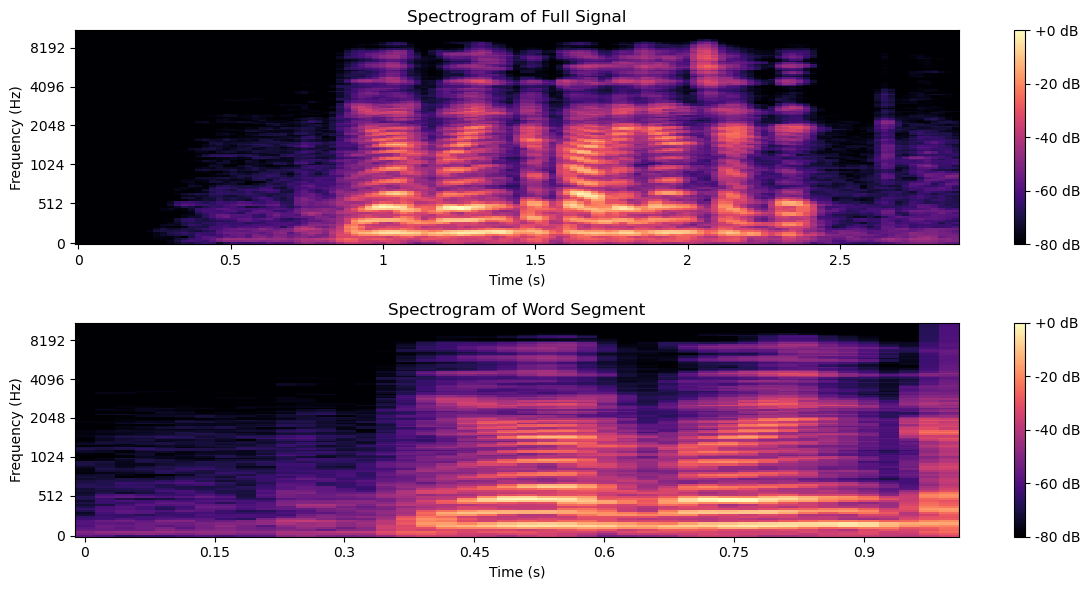

In [3]:
audio_path = 'statement.wav'

full_audio_signal, sample_rate = librosa.load(audio_path)

word_start_time = 0.5
word_end_time = 1.5

start_sample = librosa.time_to_samples(word_start_time, sr=sample_rate)
end_sample = librosa.time_to_samples(word_end_time, sr=sample_rate)

word_segment = full_audio_signal[start_sample:end_sample]

full_spec = librosa.feature.melspectrogram(y=full_audio_signal, sr=sample_rate)
word_spec = librosa.feature.melspectrogram(y=word_segment, sr=sample_rate)

full_spec_db = librosa.power_to_db(full_spec, ref=np.max)
word_spec_db = librosa.power_to_db(word_spec, ref=np.max)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(full_spec_db, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Full Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.subplot(2, 1, 2)
librosa.display.specshow(word_spec_db, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Word Segment')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()

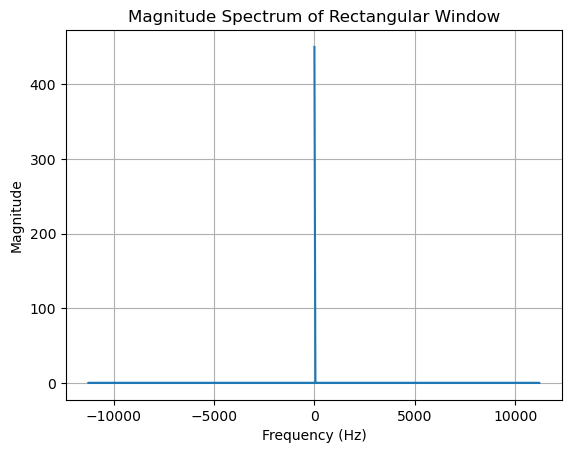

In [4]:
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 22500 
window_duration = 0.02  

window_length_samples = int(window_duration * sampling_rate)

rectangular_window = np.ones(window_length_samples)

fft_result = np.fft.fft(rectangular_window)

frequency_axis = np.fft.fftfreq(window_length_samples, 1 / sampling_rate)

plt.plot(frequency_axis, np.abs(fft_result))
plt.title('Magnitude Spectrum of Rectangular Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

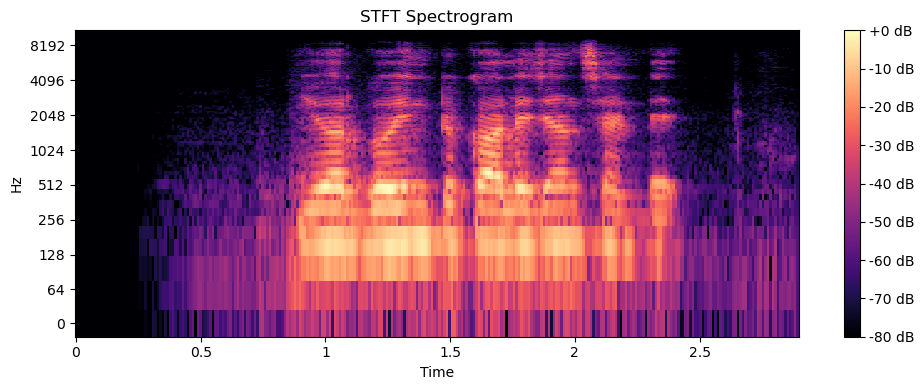

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

file_path = "statement.wav"
audio_signal, sample_rate = librosa.load(file_path)

window_length_samples = int(0.02 * sample_rate)
hop_length_samples = int(0.01 * sample_rate)
D = librosa.stft(audio_signal, n_fft=window_length_samples, hop_length=hop_length_samples)
D_amplitude = np.abs(D)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(D_amplitude, ref=np.max), sr=sample_rate, hop_length=hop_length_samples, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Spectrogram')
plt.tight_layout()
plt.show()

C:\Users\buset\AppData\Local\Temp\ipykernel_11152\1765696459.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(spec_scipy), shading='gouraud')


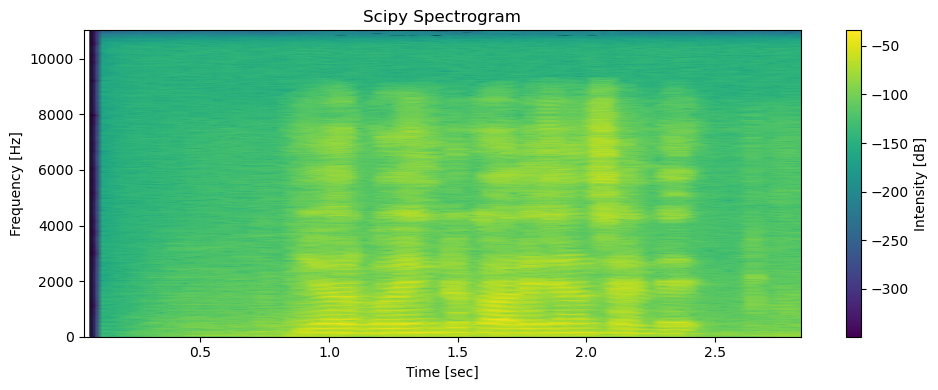

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import librosa
import librosa.display

file_path = "statement.wav" 
audio_signal, sample_rate = librosa.load(file_path)

frequencies, times, spec_scipy = spectrogram(audio_signal, fs=sample_rate, nperseg=2048, noverlap=1536)

plt.figure(figsize=(10, 4))
plt.pcolormesh(times, frequencies, 10 * np.log10(spec_scipy), shading='gouraud')
plt.title('Scipy Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Intensity [dB]')
plt.tight_layout()
plt.show()